# Problem Statement
The problem we are aiming to solve is to use an image data source and a computer vision application in order to classify a given dish at Social 704 as vegetarian or non-vegetarian, and so help those with dietary restrictions identify the dish they are eating. For this project, a vegetarian dish is one
that excludes meat and may or may not include animal by-products such as dairy and eggs, and is also non-vegan. A non-vegetarian dish is defined as all other dishes present. The input images will be limited by exclusively being from
the Social 704 restaurant menu in order to prevent potential false positives and false negatives that may arise from different preparations and ingredients present of a similarly classed dish.

---



# Literature Review

**DeepFood: Deep Learning-Based Food Image Recognition for Computer-Aided Dietary Assessment**
- The paper aimed to solve the issue of deriving food information, such as food type and portion size, from food images through a new CNN algorithm.
- Used 2 datasets: UEC, developed by the DeepFoodCam project, which contained 256 categories with around 28000 total images.
- Researchers achieved a 77.4 % accuracy rate compared to 56.4% and 50.76% accuracy reached through previous research.
- Able to reach these levels of accuracy through the use of a bounding box to crop the raw image.
- Using a bounding box to crop the images to show only the food itself as a strategy to increase accuracy could be applied to our project

Liu, C., Cao, Y., Luo, Y., Chen, G., Vokkarane, V., Ma, Y. DeepFood: Deep Learning-Based Food Image Recognition for Computer-Aided Dietary Assessment. In: Chang, C., Chiari, L., Cao, Y., Jin, H., Mokhtari, M., Aloulou, H. (eds) Inclusive Smart Cities and Digital Health. ICOST 2016. Lecture Notes in Computer Science(), vol 9677. Springer, Cham. https://doi.org/10.1007/978-3-319-39601-9_4


**Application of Deep Learning in Food: A Review**
- This is a review of multiple different academic articles concerning deep learning and food science.
- A number of the articles reviewed were about food classification, and the quality detection of vegetables and fruits, and the quality detection of meat. - There are a multitude of different uses of deep learning algorithms for food classification.

Zhou, Lei, et al. “Application of deep learning in Food: A Review.” Comprehensive Reviews in Food Science and Food Safety, vol. 18, no. 6, 2019, pp. 1793–1811, https://doi.org/10.1111/1541-4337.12492.


**YOLOv5 and Pests: Good Practice for our Network?**
- Study to detect different insect pests in susceptible crops.
- Encourages strong use of Deep Learning approach, contains analysis of YOLOv5 network.
- Results
  - Many different iterations of YOLO used, and YOLOv5 deep learning detector produced best detection results despite noise and varying conditions of data

Ahmad, Iftikhar, et al. “Deep Learning Based Detector YOLOv5 for Identifying Insect Pests.” Applied Sciences, vol. 12, no. 19, Oct. 2022, p. 10167. Crossref, https://doi.org/10.3390/app121910167. https://www.mdpi.com/2076-3417/12/19/10167


**Machine Learning Based Approach on Food Recognition and Nutrition Estimation**
- A document describing the methods used in deep learning to recognize food category types and their nutritional values.
- The experiment used 3 different CNN models with 50,000 images. Accuracy achieved through these models ranged between 78.3% to 98.31%.
- The document describes setbacks to the systeming, and areas to improve on for future experiments.
- For composite foods, such as salad, we need image segmentation for get the distinct features.
- Many models will work for this type of system, but Inception-v3 and Inception-v4 seem to perform best.

Zhidong Shen, Adnan Shehzad, Si Chen, Hui Sun, Jin Liu, Machine Learning Based Approach on Food Recognition and Nutrition Estimation, Procedia Computer Science, Volume 174, 2020, Pages 448-453, ISSN 1877-0509, https://doi.org/10.1016/j.procs.2020.06.113.

**Deep Learning Detection of Cancer Metastases on the Brain on MRI**
- A study on the use of computer vision technology and deep-learning to find brain metastasis on MRIs.
- The contributors go into detail the process from data collection with accredited doctors to the breakdown of their training and testing.
- The article also exposes the reader to challenges that were encountered, like the small size of metastasis and how they frequently change.  
- Something similar is expected to our problem statement.
- 12/276 metastases were missed by the completed model giving it an approximate 95% accuracy.
- In the end this deep-learning technology may become crucial as it is studied and developed.

Zhang, M., Young, G. S., Chen, H., Li, J., Qin, L., McFaline-Figueroa, J. R., Reardon, D. A., Cao, X., Wu, X., & Xu, X. (2020). Deep-Learning Detection of Cancer Metastases to the Brain on MRI. Journal of Magnetic Resonance Imaging, 52(4), 1227-1236. https://doi.org/10.1002/jmri.27129





# Data Breakdown
After data colleciton, samples are classified as either vegetarian or non-vegetarian.

Visualization of samples:

Vegetarian examples:

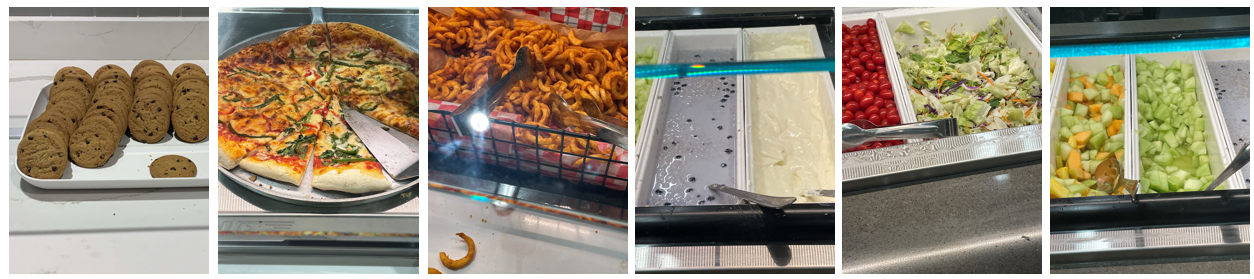

Non-vegetarian examples:

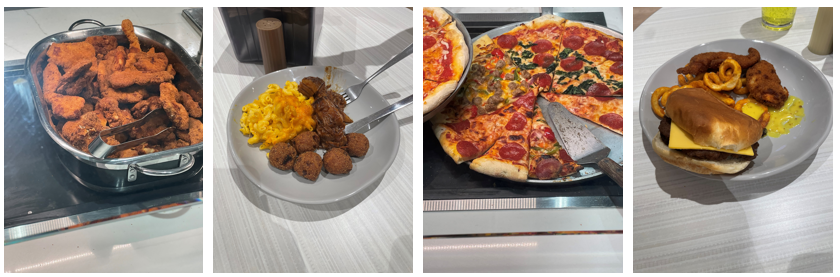

# Sample Breakdown
Total number of samples:
- 226 Non-Vegetarian Images
- 137 Vegetarian Images
- 363 Total Images

Training, Validation, and Testing split: 70% training, 10% Validation, 20% testing


# Dependencies

In [ ]:
import cv2
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import random

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/Computer Vision Group 8'

/content/gdrive/My Drive/Computer Vision Group 8


# Step 1: Load Pretrained Inception-v4 Model
Using timm, Inception-v4 is loaded with pretrained weights. All parameters are frozen in the model for Transfer Learning, and the last layer is replaced with a Linear Classifier that goes into 1 output.

This 1 output will be the basis for binary classification in our model.

A diagram explaining each layer of the model is given below.

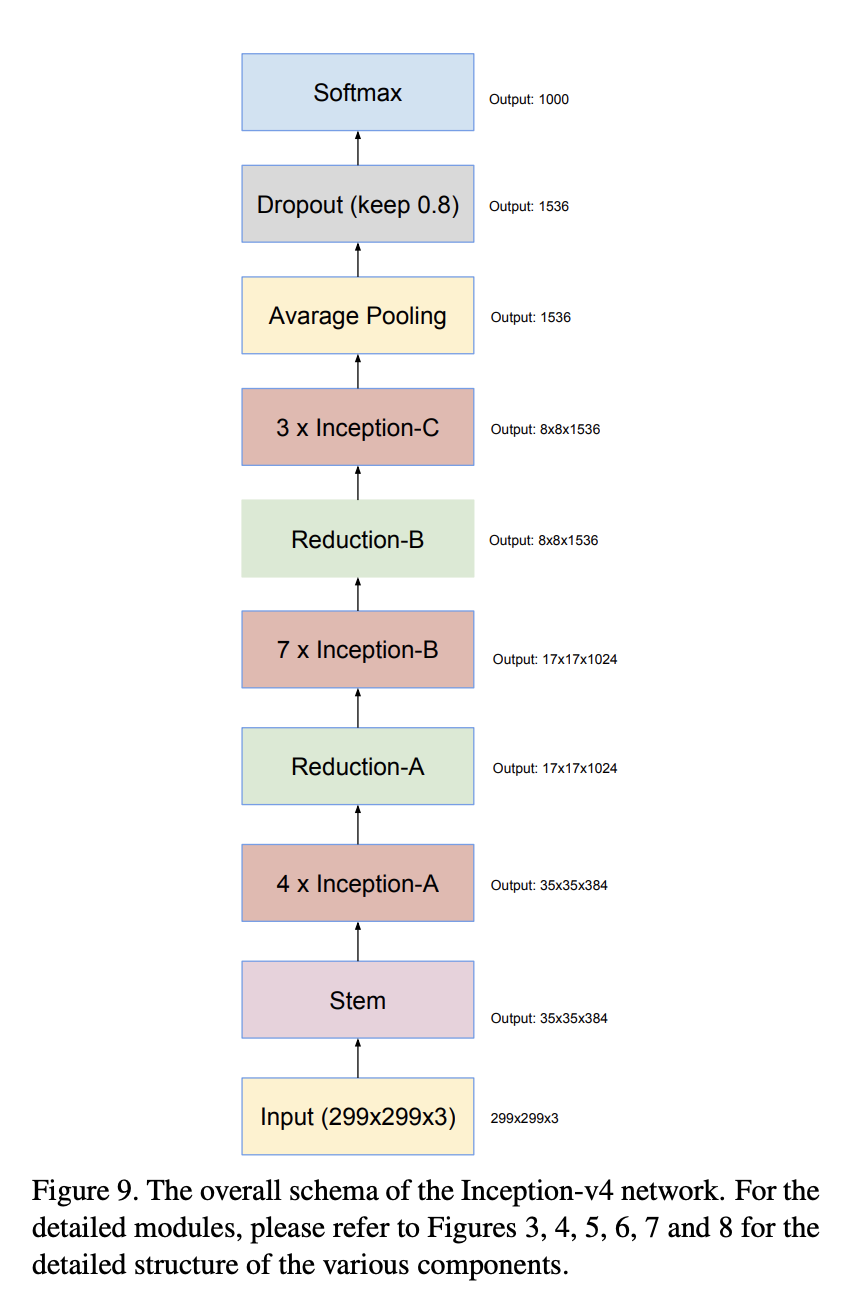

Source: Szegedy, C., Ioffe, S., Vanhoucke, V., &amp; Alemi, A. (2016, August 23). Inception-V4, inception-resnet and the impact of residual connections on learning. arXiv.org. https://arxiv.org/abs/1602.07261

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.3 MB/s eta 0:00:00


In [ ]:
import timm

model = timm.create_model('inception_v4', pretrained=True)
model.train()

for param in model.parameters():
  param.requires_grad = False

for param in model.last_linear.parameters():
    param.requires_grad = True

num_ftrs = model.last_linear.in_features

model.last_linear = nn.Sequential(
    nn.Dropout(p=0.8),
    nn.Linear(num_ftrs, 1)
)

model.safetensors:   0%|          | 0.00/171M [00:00<?, ?B/s]

#Step 2: Load Data

## 2.1: Load each image from Google Drive
Each image is loaded from Google Drive and classified accordingly.

Images contains the raw data for each image
Labels contains the classification for each image
- 0 means Vegetarian
- 1 means Non-Vegetarian

In [ ]:
import os
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform
from PIL import Image
from google.colab.patches import cv2_imshow

config = resolve_data_config({}, model=model)
transform = create_transform(**config)

images = []
labels = []

for root, dirs, files in os.walk('stage2_data/'):
  for name in files:
    class_name = ''
    if root == 'stage2_data/Veg':
      class_name = 0
    else:
      class_name = 1

    image_path = os.path.join(root, name)
    print(f'Loading {image_path} with class name {class_name}')
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)

    images.append(image)
    labels.append(class_name)

images = torch.stack(images)
labels = torch.tensor(labels)

Loading stage2_data/Veg/IMG_4513.JPG with class name 0
Loading stage2_data/Veg/IMG_4504.JPG with class name 0
Loading stage2_data/Veg/IMG_7455.JPG with class name 0
Loading stage2_data/Veg/IMG_4505.JPG with class name 0
Loading stage2_data/Veg/IMG_4511.JPG with class name 0
Loading stage2_data/Veg/IMG_4513_1.JPG with class name 0
Loading stage2_data/Veg/IMG_4502.JPG with class name 0
Loading stage2_data/Veg/401935601_1107118880666590_4641076602552044733_n.jpg with class name 0
Loading stage2_data/Veg/323686169_204941458717088_2509685815519229047_n.jfif with class name 0
Loading stage2_data/Veg/315666520_721270562174613_2436013780704348743_n.jpg with class name 0
Loading stage2_data/Veg/307428840_632454825057954_708272937112253032_n.jpg with class name 0
Loading stage2_data/Veg/396562720_641412084828658_8102278769510171969_n.jpg with class name 0
Loading stage2_data/Veg/324071279_104567069160558_389887985941909797_n.jfif with class name 0
Loading stage2_data/Veg/312972916_62993153868033

## Step 2.2: Split data into Training, Validation, and Testing sets
Using Scikit Learn's train_test_split function, the images and labels are split into separate datasets. The labels are stratified to make sure each data set has an even amount of each label for each set.
- Training Set
  - This data set is for re-training the model to fit our solution
  - 70% of all data
- Validation Set
  - This data set is used to show loss on new data to help with changing hyperparameters
  - 10% of all data
- Testing Set
  - This data set is used to show metrics of the model on new unseen data
  - 20% of all data

In [ ]:
from sklearn.model_selection import train_test_split
image_2, image_test, labels_2, labels_test = train_test_split(images, labels, test_size=0.20, stratify=labels, random_state=42)
image_train, image_val, labels_train, labels_val = train_test_split(image_2, labels_2, test_size=0.1, random_state=42)

## Step 2.3: Data Processing
The images must be packaged for the model.

First, a transformation is defined for the training set to allow for Data Augmentation. Then, each dataset is combined with its labels using a custom defined CustomDataset class. The CustomDataset class has 3 attributes containing images, labels, and transforms if given.

Afterwards, the CustomDataset objects for each dataset is converted into PyTorch DataLoader objects for use in the model.

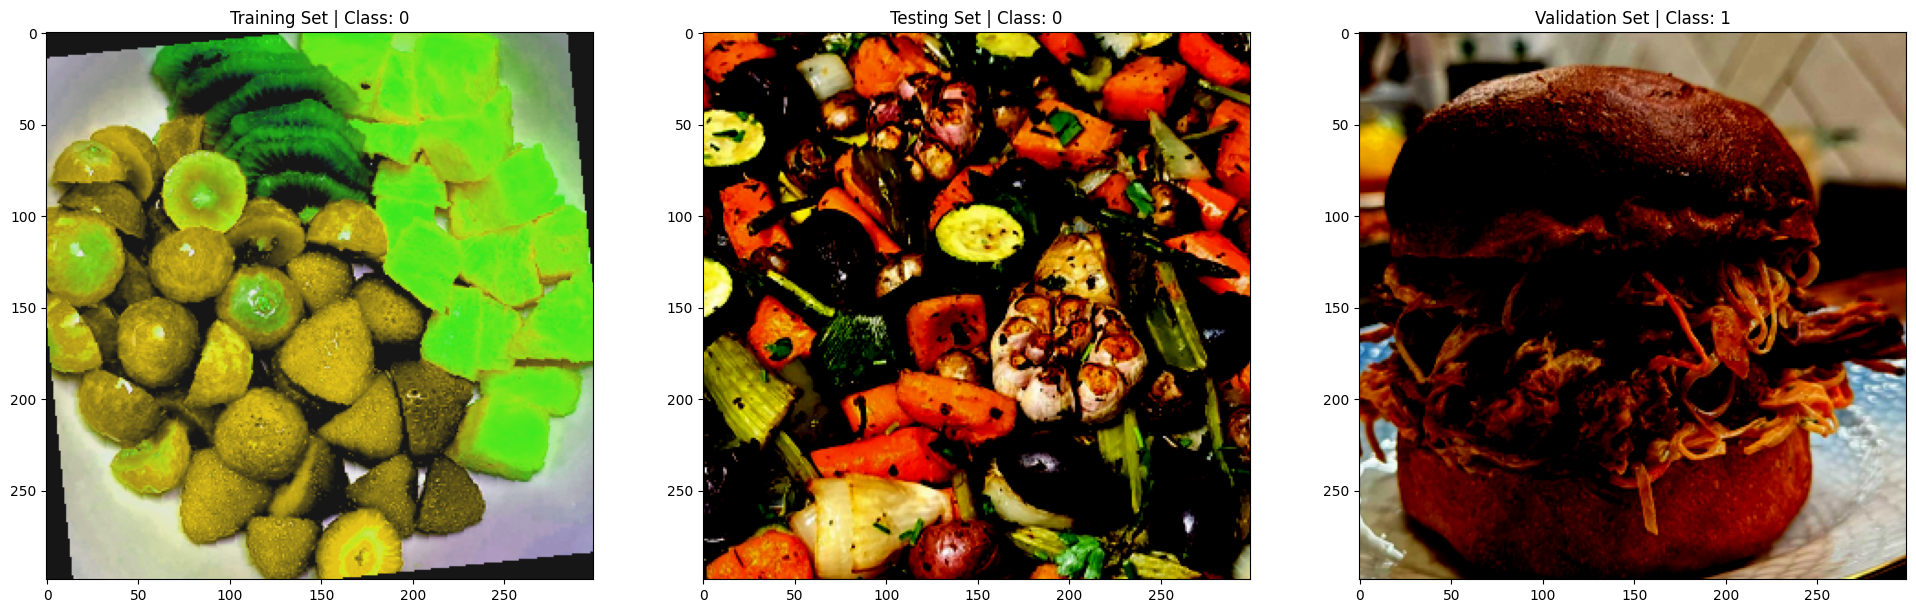

In [ ]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define data transformations for training and testing
transform_train = transforms.Compose([
    transforms.RandomRotation(degrees=20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
])

transform_test_val = transforms.Compose([
])

# Create custom dataset classes for training and testing
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image, label = self.images[idx], self.labels[idx]
        random.seed(42)
        if self.transform:
            image = self.transform(image.squeeze())
        return image, label

# Create CustomDatasets for each data set
train_dataset = CustomDataset(image_train, labels_train, transform=transform_train)
test_dataset = CustomDataset(image_test, labels_test, transform=transform_test_val)
val_dataset = CustomDataset(image_val, labels_val, transform=transform_test_val)

# Convert from CustomDataset to DataLoader for training and testing
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)

f, subplot = plt.subplots(1, 3, figsize=(24,24))
subplot[0].imshow(train_dataset[0][0].permute(1, 2, 0).clamp(0, 1))
subplot[0].set_title(f'Training Set | Class: {train_dataset[0][1].numpy()}')
subplot[1].imshow(test_dataset[0][0].permute(1, 2, 0).clamp(0, 1))
subplot[1].set_title(f'Testing Set | Class: {test_dataset[0][1].numpy()}')
subplot[2].imshow(val_dataset[0][0].permute(1, 2, 0).clamp(0, 1))
subplot[2].set_title(f'Validation Set | Class: {val_dataset[0][1].numpy()}')

plt.show()

# Step 3: Model Training and Testing

## Step 3.1: Model Training

The model is trained using these hyperparameters and functions:
- Hyperparameters
  - Alpha/Learning Rate: 0.001
  - Epochs: 25
  - Momentum: 0.9
- Functions:
  - Loss Criterion: BCE With Logits Loss
  - Optimizer: Stochastic Gradient Descent

Multiple different hyperparameters and functions were used, but these give the best balance between all metrics for our dataset and model.

Each epoch, the model is fed the batch of images, and the model is trained. After training the model is set to evaluation mode, and the model evaluates the validation set. After training, training and validation loss is plotted for each epoch.

In [ ]:
# Create loss function calculator and stochastic gradient descent optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.last_linear.parameters(), lr=0.001, momentum=0.9)
#optimizer = torch.optim.Adam(model.last_linear.parameters(), lr=0.001)

# Move model to GPU
model = model.to('cuda')

loss_values = []
val_loss_values = []

accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

patience = 3
delta = 0.001
best_loss = float('inf')
counter = 0
early_stop = False

# Start training
for epoch in range(25):
  print(f'Epoch: {epoch+1}')
  model.train()
  total_loss = 0.0
  total_val_loss = 0.0

  for batch_images, batch_labels in train_dataloader:
    batch_images, batch_labels = batch_images.to('cuda'), batch_labels.to('cuda')

    optimizer.zero_grad()
    outputs = model(batch_images.squeeze(1))
    loss = criterion(outputs.squeeze(), batch_labels.float())
    loss.backward()
    optimizer.step()
    total_loss += loss.item()

  model.eval()
  with torch.no_grad():
    all_predictions = []
    all_labels = []

    #Validate each batch
    for val_images, val_labels in val_dataloader:
            val_images, val_labels = val_images.to('cuda'), val_labels.to('cuda')

            val_outputs = model(val_images.squeeze(1))
            val_loss = criterion(val_outputs.squeeze(), val_labels.float())
            total_val_loss += val_loss.item()

    for trn_images, trn_labels in train_dataloader:
            trn_images, trn_labels = trn_images.to('cuda'), trn_labels.to('cuda')

            trn_outputs = model(trn_images.squeeze(1))
            probabilities = F.sigmoid(trn_outputs)
            predictions = (probabilities > 0.5).float()

            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(trn_labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions)

    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)

    print(f'Accuracy: {accuracy: .4f}, Precision: {precision: .4f}, Recall: {recall: .4f}, F1-score: {f1: .4f}')

  #Calculate average loss for both training and validation
  average_loss = total_loss / len(train_dataloader)
  print(f'Training - Loss: {average_loss}')
  loss_values.append(average_loss)

  average_val_loss = total_val_loss / len(val_dataloader)
  print(f'Validation - Loss: {average_val_loss}')
  val_loss_values.append(average_val_loss)

  if average_loss < best_loss - delta:
    best_loss = average_loss
    counter = 0
  else:
    counter += 1
    if counter >= patience:
      print("Stopping early")
      break


Epoch: 1
Accuracy:  0.6322, Precision:  0.6322, Recall:  1.0000, F1-score:  0.7746
Training - Loss: 0.7139053675863478
Validation - Loss: 0.6941397786140442
Epoch: 2
Accuracy:  0.6322, Precision:  0.6322, Recall:  1.0000, F1-score:  0.7746
Training - Loss: 0.6409847935040792
Validation - Loss: 0.7144675254821777
Epoch: 3
Accuracy:  0.6322, Precision:  0.6322, Recall:  1.0000, F1-score:  0.7746
Training - Loss: 0.6480043530464172
Validation - Loss: 0.6952382326126099
Epoch: 4
Accuracy:  0.6322, Precision:  0.6322, Recall:  1.0000, F1-score:  0.7746
Training - Loss: 0.6806717846128676
Validation - Loss: 0.6824874877929688
Epoch: 5
Accuracy:  0.6628, Precision:  0.6522, Recall:  1.0000, F1-score:  0.7895
Training - Loss: 0.6396457619137235
Validation - Loss: 0.6782882809638977
Epoch: 6
Accuracy:  0.6552, Precision:  0.6482, Recall:  0.9939, F1-score:  0.7847
Training - Loss: 0.6261691053708395
Validation - Loss: 0.6782934069633484
Epoch: 7
Accuracy:  0.6360, Precision:  0.6346, Recall:  1

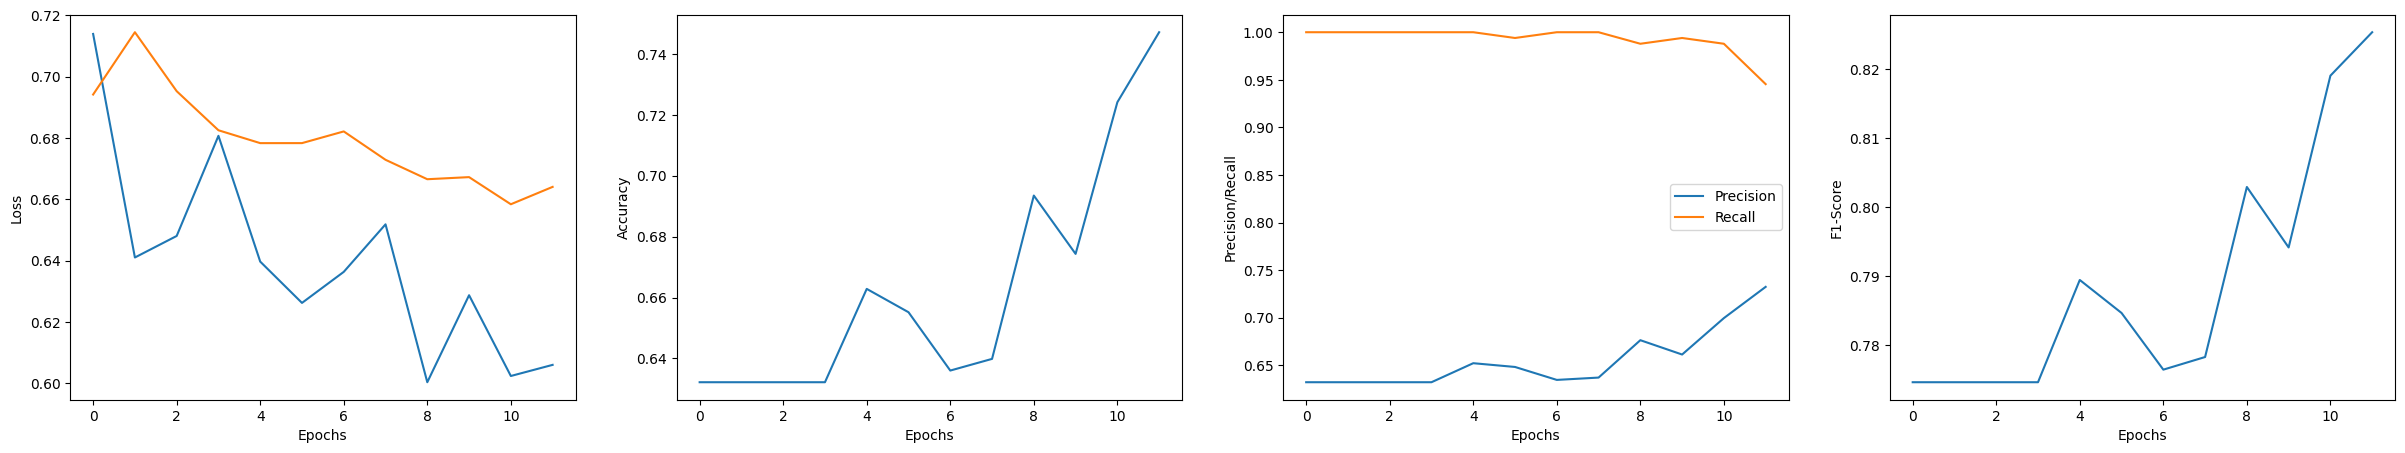

In [ ]:
# Display Metrics
f, subplot = plt.subplots(1, 4, figsize=(30,5))

subplot[0].plot(loss_values)
subplot[0].plot(val_loss_values)
subplot[0].set_ylabel('Loss')
subplot[0].set_xlabel('Epochs')

subplot[1].plot(accuracy_values)
subplot[1].set_ylabel('Accuracy')
subplot[1].set_xlabel('Epochs')

ax_pre, = subplot[2].plot(precision_values)
ax_rec, = subplot[2].plot(recall_values)
subplot[2].legend([ax_pre, ax_rec], ['Precision', 'Recall'])
subplot[2].set_ylabel('Precision/Recall')
subplot[2].set_xlabel('Epochs')

subplot[3].plot(f1_values)
subplot[3].set_ylabel('F1-Score')
subplot[3].set_xlabel('Epochs')
plt.show()

## Step 3.2: Model Testing

After training the model is tested with the testing set. Each output is thresholded at 0.5, anything below 0.5 is classified as vegetarian, anything above is non-vegetarian.

The accuracy, precision, recall, F1 Score, and Confusion Matrix is output for the model.

Accuracy:  0.7123, Precision:  0.7500, Recall:  0.8000, F1-score:  0.7742


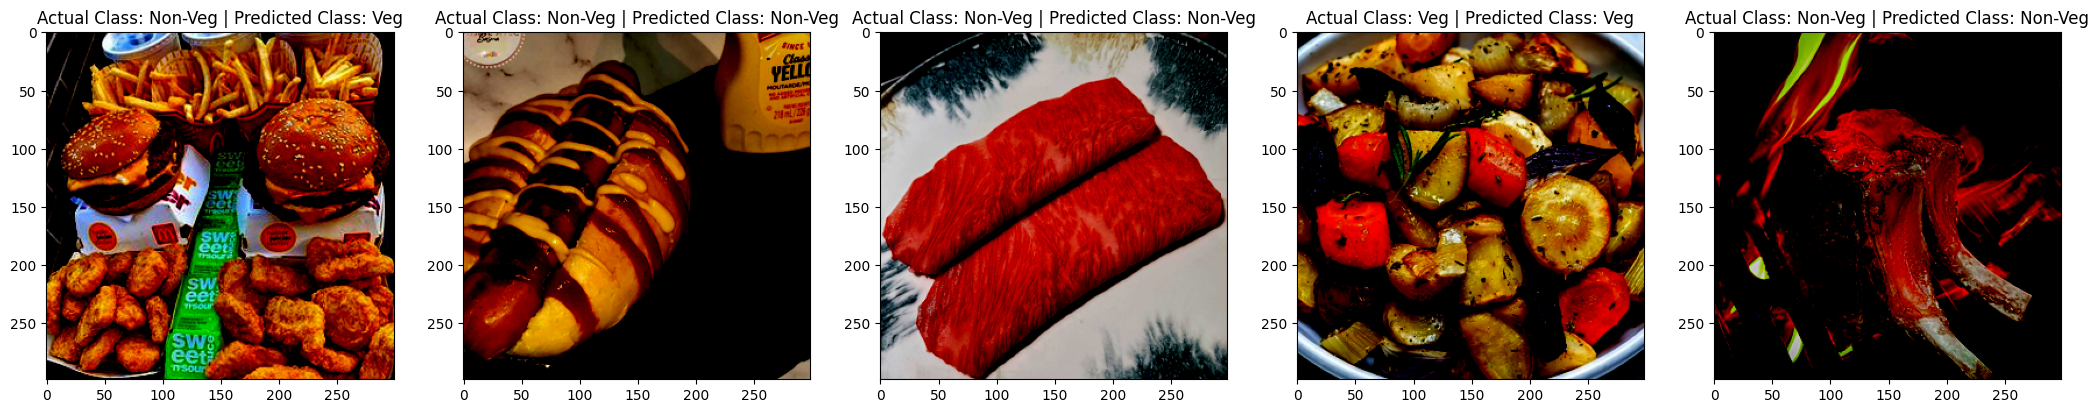

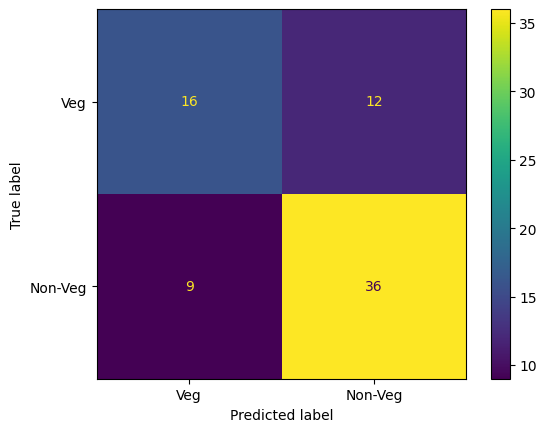

In [ ]:
model.eval()
all_predictions = []
all_labels = []

idx = 0
f, subplot = plt.subplots(1, 5, figsize=(26,26))

with torch.no_grad():
  for batch_images, batch_labels in test_dataloader:
    batch_images, batch_labels = batch_images.to('cuda'), batch_labels.to('cuda')
    outputs = model(batch_images.squeeze(1))
    probabilities = F.sigmoid(outputs)
    predictions = (probabilities > 0.5).float()

    all_predictions.extend(predictions.cpu().numpy())
    all_labels.extend(batch_labels.cpu().numpy())

    if idx == 0:
      for i in range(5):
        subplot[i].imshow(batch_images[i].cpu().permute(1, 2, 0).clamp(0, 1))
        actual_class = 'Non-Veg' if batch_labels[i].cpu().numpy() else 'Veg'
        pred_class = 'Non-Veg' if predictions[i][0].cpu().numpy() else 'Veg'
        subplot[i].set_title(f'Actual Class: {actual_class} | Predicted Class: {pred_class}')

    idx += 1


accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)
c_matrix = confusion_matrix(all_labels, all_predictions)

print(f'Accuracy: {accuracy: .4f}, Precision: {precision: .4f}, Recall: {recall: .4f}, F1-score: {f1: .4f}')

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=("Veg", "Non-Veg"))
disp.plot()
plt.show()

# Miscellaneous Model Usage


In [ ]:
#Stops notebook running before utility functions
0/0

ZeroDivisionError: ignored

In [ ]:
#Mount Folder
from google.colab import drive
drive.mount('/content/gdrive')

%cd '/content/gdrive/My Drive/Computer Vision Group 8'

In [ ]:
#Save Current Model
torch.save(model.state_dict(), 'model_states/model.pth')

NameError: ignored

In [ ]:
#Load Saved model
!pip install timm
import timm
import torch
import torchvision
import torchvision.transforms as transforms

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

model = timm.create_model('inception_v4', pretrained=True)
model.load_state_dict(torch.load('model_states/model.pth'))

model.eval()

InceptionV4(
  (features): Sequential(
    (0): ConvNormAct(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNormAct2d(
        32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
    (1): ConvNormAct(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
    (2): ConvNormAct(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
    )
    (3): Mixed3a(
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (c

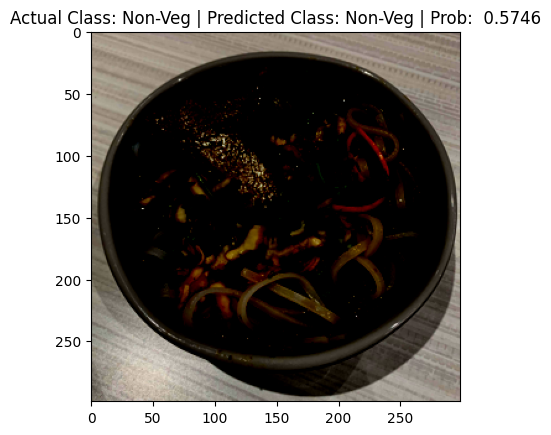

In [ ]:
#Evaluate image
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

'''
  Insert an image url

  0 means Veg
  1 means Non-Veg
'''
image_url = 'https://cdn.discordapp.com/attachments/1163892013591167138/1172336367439712326/IMG_7456.jpg?ex=65726752&is=655ff252&hm=79ef8409eb1653e109a6b0ed6c5861f7787b555c4d0d240cd630741b72d4c805&'
label = 1

config = resolve_data_config({}, model=model)
transform = create_transform(**config)

response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert('RGB')
image = transform(image).unsqueeze(0)

label = torch.tensor(label)

with torch.no_grad():
  val_image, val_label = image.to('cuda'), label.to('cuda')
  model = model.to('cuda')
  outputs = model(val_image.squeeze(1))
  probabilities = F.sigmoid(outputs)
  predictions = (probabilities > 0.5).float()

  plt.imshow(image[0].cpu().permute(1, 2, 0).clamp(0, 1))
  actual_class = 'Non-Veg' if val_label.cpu().numpy() else 'Veg'
  pred_class = 'Non-Veg' if predictions[0].cpu().numpy() else 'Veg'
  plt.title(f'Actual Class: {actual_class} | Predicted Class: {pred_class} | Prob: {probabilities.cpu().item(): .4f}')

plt.show()